In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier


import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('credit_train.csv')

In [4]:
df_test = pd.read_csv('credit_test.csv')

In [5]:
df = pd.concat([df,df_test])

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,...,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0'
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,...,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0'
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,...,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0'
3,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,-0.224304,...,0.011025,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,32.0,'0'
4,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,-0.506793,...,0.237543,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,64.9,'0'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27   

In [8]:
df.Class.unique()

array(["'0'", "'1'"], dtype=object)

In [9]:
df.Class = LabelEncoder().fit_transform(df['Class'])

In [10]:
X = df.iloc[:,:-1].values

In [11]:
Y = df.iloc[:,-1:].values

In [12]:
X.shape

(284807, 29)

In [13]:
Y.shape

(284807, 1)

In [14]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20,random_state=30)

In [15]:
log_reg = LogisticRegression().fit(train_x,train_y)

In [16]:
log_predict = log_reg.predict(test_x)

In [17]:
metrics.confusion_matrix(test_y,log_predict)

array([[56851,    10],
       [   33,    68]])

In [18]:
metrics.accuracy_score(test_y,log_predict)

0.9992451107756047

In [19]:
# KNN
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn.score(test_x,test_y)
knn_pred = knn.predict(test_x)

In [20]:
# RF
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf.score(test_x,test_y)
rf_pred = rf.predict(test_x)

In [21]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_train_pred = gnb.predict(train_x)
gnb_test_pred = gnb.predict(test_x)

In [22]:
ada_bst = AdaBoostClassifier()
ada_bst.fit(train_x,train_y)
ada_bst_train_pred = ada_bst.predict(train_x)
ada_bst_test_pred = ada_bst.predict(test_x)

In [23]:
xg_bst = XGBClassifier()
xg_bst.fit(train_x,train_y)
xg_bst_train_pred = xg_bst.predict(train_x)
xg_bst_test_pred = xg_bst.predict(test_x)

In [24]:
xg_bst_rf = XGBRFClassifier()
xg_bst_rf.fit(train_x,train_y)
xg_bst_rf_train_pred = xg_bst_rf.predict(train_x)
xg_bst_rf_test_pred = xg_bst_rf.predict(test_x)

In [27]:
# from sklearn.metrics import classification_report
print("Log",f1_score(test_y, log_predict))
print("KNN",f1_score(test_y, knn_pred))
print("RF",f1_score(test_y, rf_pred))
print("GNB",f1_score(test_y, gnb_test_pred))
print("ADAB",f1_score(test_y, ada_bst_test_pred))
print("XG",f1_score(test_y, xg_bst_test_pred))
print("XGBRF",f1_score(test_y, xg_bst_rf_test_pred))


Log 0.7597765363128492
KNN 0.7727272727272727
RF 0.8723404255319149
GNB 0.12019566736547871
ADAB 0.8121827411167514
XG 0.888888888888889
XGBRF 0.8775510204081632


In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('XGBRF', XGBRFClassifier()))
models.append(('RF', RandomForestClassifier()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=25)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.727775 (0.043556)
KNN: 0.733601 (0.083218)
DTC: 0.719479 (0.073054)
NB: 0.111379 (0.010485)
ADB: 0.731216 (0.064143)
XGB: 0.858887 (0.046042)
XGBRF: 0.840911 (0.039539)
RF: 0.835049 (0.044202)


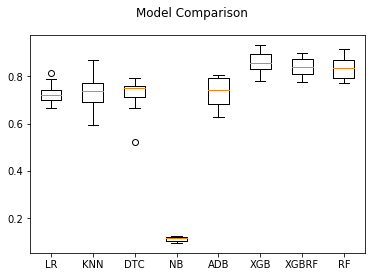

In [29]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()